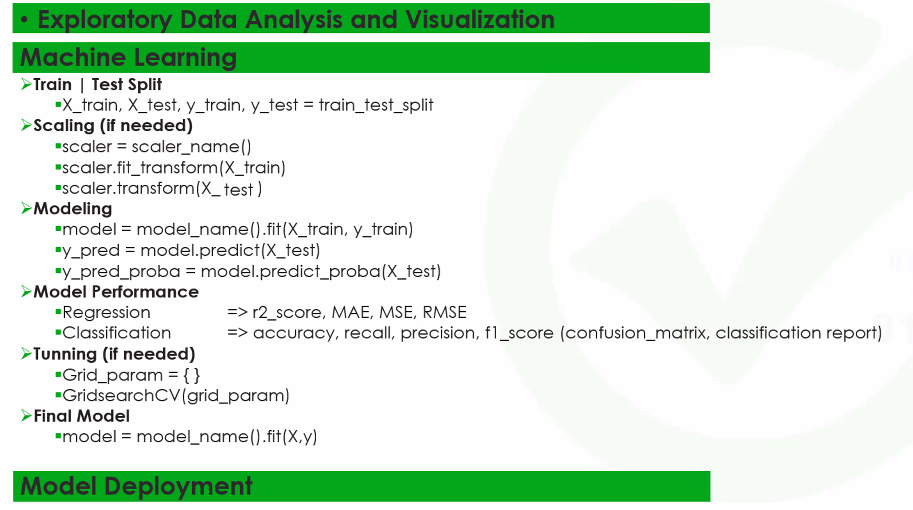

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (9,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [37]:
df = pd.read_csv("iris.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


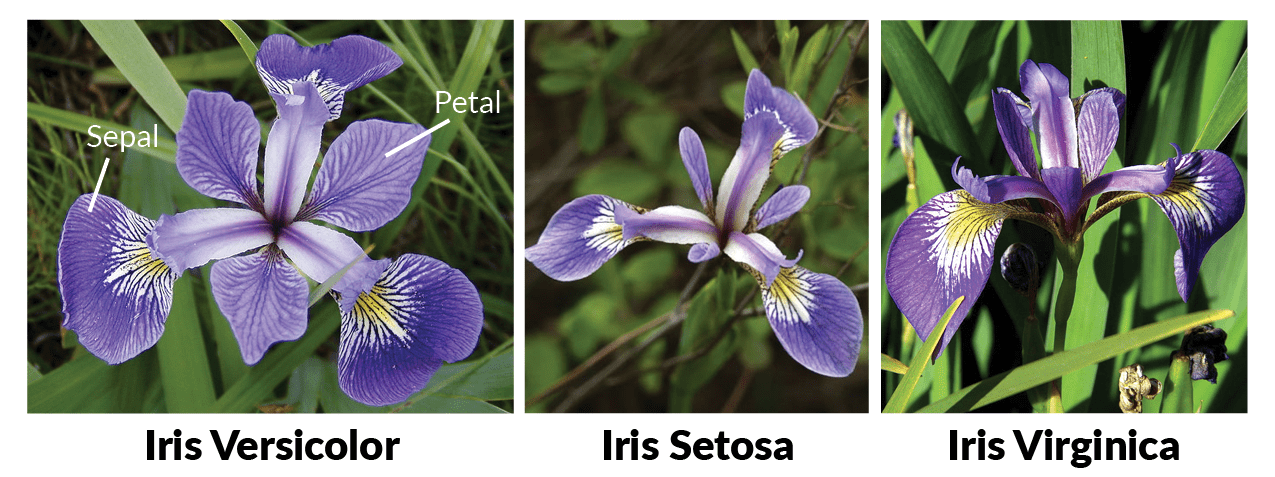

Veri seti, her biri 50 örnekten oluşan üç Iris türüne ait toplam 150 çiçek örneğini içerir. Her bir çiçek örneği için dört özellik (feature) ölçülmüştür:

1. **sepal_length**: Çiçeğin sepal (taç yaprağını koruyan dış yaprak) bölümünün uzunluğu.
2. **sepal_width**: Çiçeğin sepal bölümünün genişliği.
3. **petal_length**: Çiçeğin petal (renkli, gösterişli çiçek yaprağı) bölümünün uzunluğu.
4. **petal_width**: Çiçeğin petal bölümünün genişliği.

Bu özellikler, her bir Iris türünü birbirinden ayırt etmek için kullanılır.

# EDA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.057,0.436,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.758,1.765,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.762,0.100,0.300,1.300,1.800,2.500


<Axes: xlabel='species', ylabel='count'>

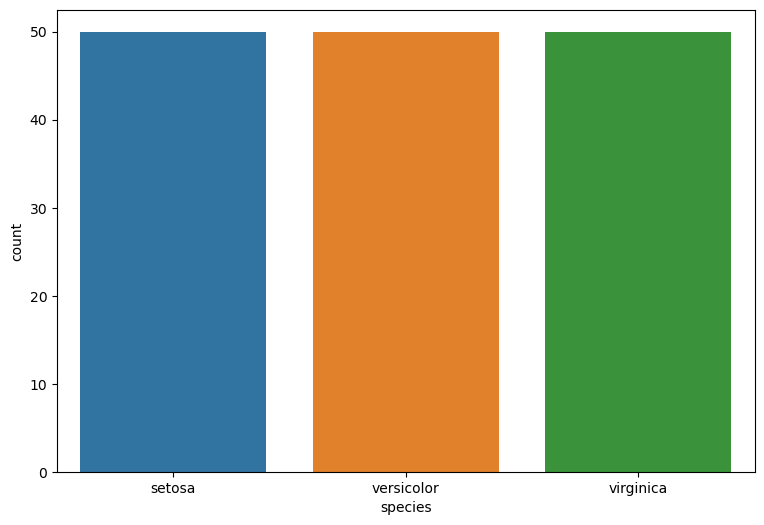

In [40]:
sns.countplot(data=df, x="species")

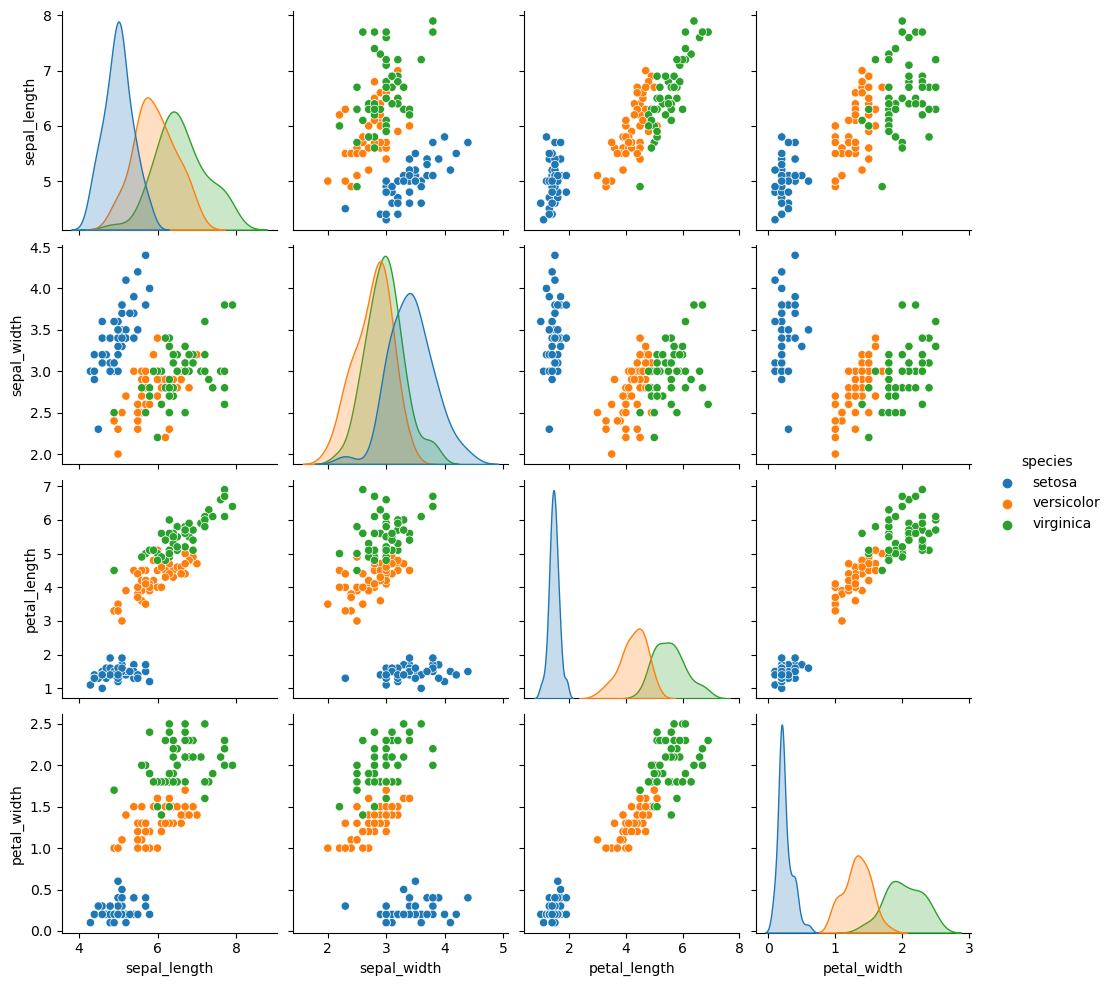

In [41]:
sns.pairplot(df, hue = "species");

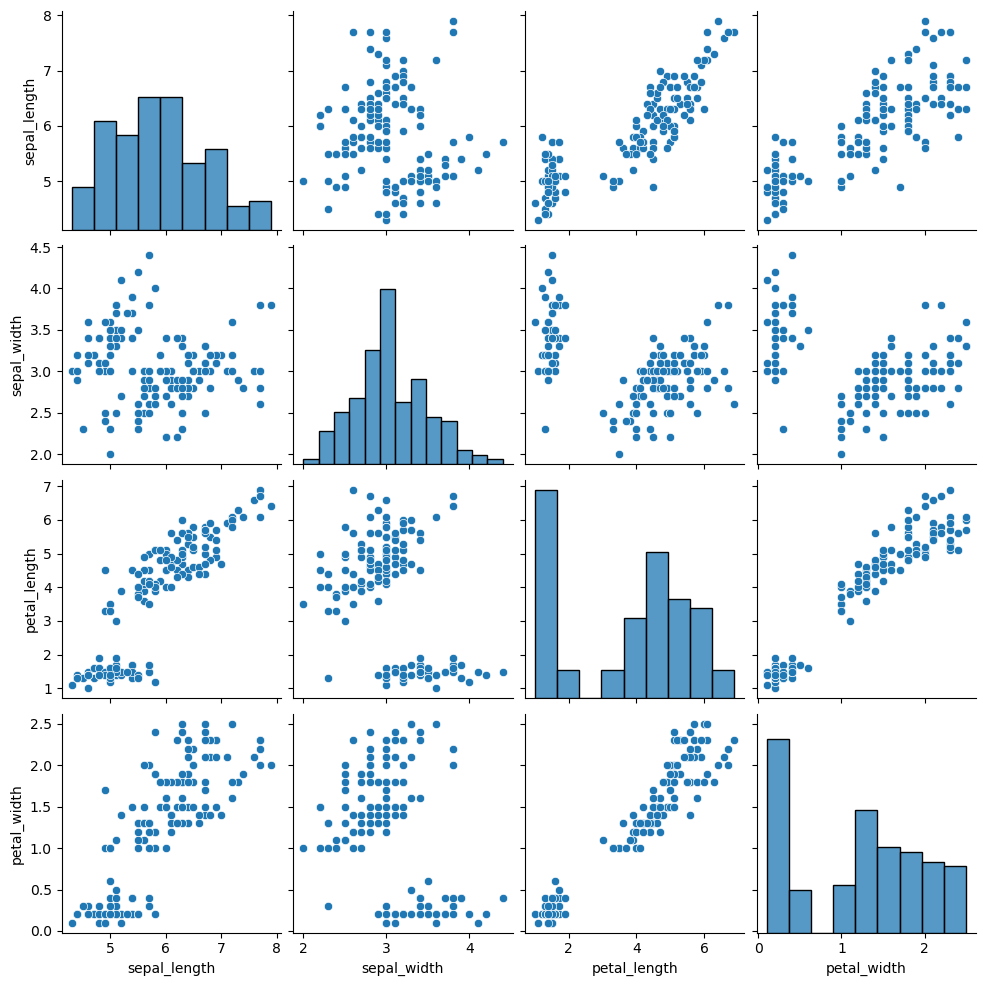

In [42]:
sns.pairplot(df);

In [43]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

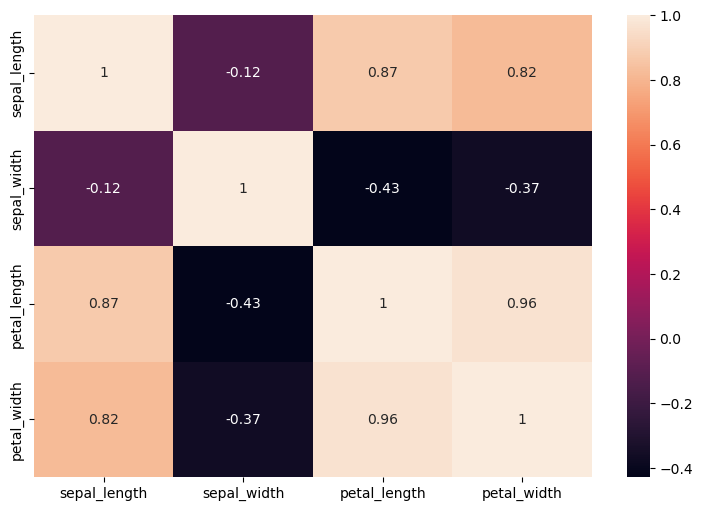

In [44]:
sns.heatmap(df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].corr(), annot= True);

In [45]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

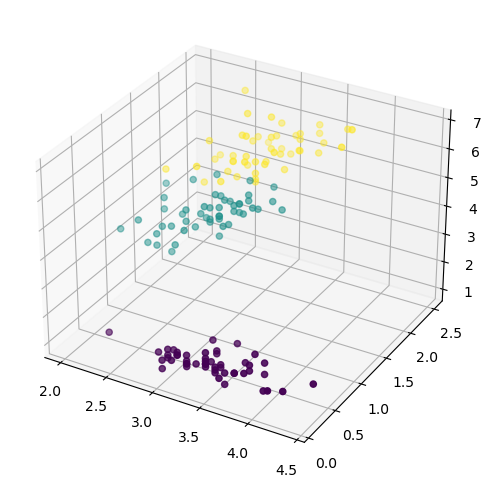

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
ax.scatter(df["sepal_width"], df["petal_width"], df["petal_length"], c=colors);

In [47]:
import plotly.express as px

In [48]:
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
fig=px.scatter_3d(df, x = "sepal_width", y = "petal_width", z = "petal_length", color = colors)
fig.show()

# Train|Test Split and Scaling

In [49]:
X = df.drop("species", axis = 1)
y = df["species"]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling and Model Performance

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### With Default Parameters

In [56]:
log_model = LogisticRegression()

In [57]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor'], dtype=object)

In [58]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.99729846, 0.00270147, 0.00000007],
       [0.99216273, 0.00783676, 0.00000051],
       [0.97318638, 0.02680612, 0.00000749],
       [0.00056587, 0.33523109, 0.66420304],
       [0.01182166, 0.80204871, 0.18612963],
       [0.00137707, 0.31231467, 0.68630826],
       [0.00086416, 0.62007674, 0.3790591 ],
       [0.01054715, 0.85833667, 0.13111619],
       [0.00032997, 0.19020907, 0.80946096],
       [0.91445911, 0.08553537, 0.00000552],
       [0.00100263, 0.15522393, 0.84377344],
       [0.99767154, 0.00232841, 0.00000005],
       [0.94106387, 0.05892923, 0.0000069 ],
       [0.00000363, 0.03221289, 0.96778348],
       [0.007008  , 0.35653191, 0.63646009],
       [0.01740679, 0.87012826, 0.11246496],
       [0.11163097, 0.80660733, 0.08176169],
       [0.06135533, 0.83739748, 0.10124719],
       [0.98343504, 0.01656411, 0.00000085],
       [0.00172303, 0.4954468 , 0.50283016],
       [0.02344058, 0.92939379, 0.04716563],
       [0.98619302, 0.0138064 , 0.00000058],
       [0.

In [59]:
np.set_printoptions(suppress = True)
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.99729846, 0.00270147, 0.00000007],
       [0.99216273, 0.00783676, 0.00000051],
       [0.97318638, 0.02680612, 0.00000749],
       [0.00056587, 0.33523109, 0.66420304],
       [0.01182166, 0.80204871, 0.18612963],
       [0.00137707, 0.31231467, 0.68630826],
       [0.00086416, 0.62007674, 0.3790591 ],
       [0.01054715, 0.85833667, 0.13111619],
       [0.00032997, 0.19020907, 0.80946096],
       [0.91445911, 0.08553537, 0.00000552],
       [0.00100263, 0.15522393, 0.84377344],
       [0.99767154, 0.00232841, 0.00000005],
       [0.94106387, 0.05892923, 0.0000069 ],
       [0.00000363, 0.03221289, 0.96778348],
       [0.007008  , 0.35653191, 0.63646009],
       [0.01740679, 0.87012826, 0.11246496],
       [0.11163097, 0.80660733, 0.08176169],
       [0.06135533, 0.83739748, 0.10124719],
       [0.98343504, 0.01656411, 0.00000085],
       [0.00172303, 0.4954468 , 0.50283016],
       [0.02344058, 0.92939379, 0.04716563],
       [0.98619302, 0.0138064 , 0.00000058],
       [0.

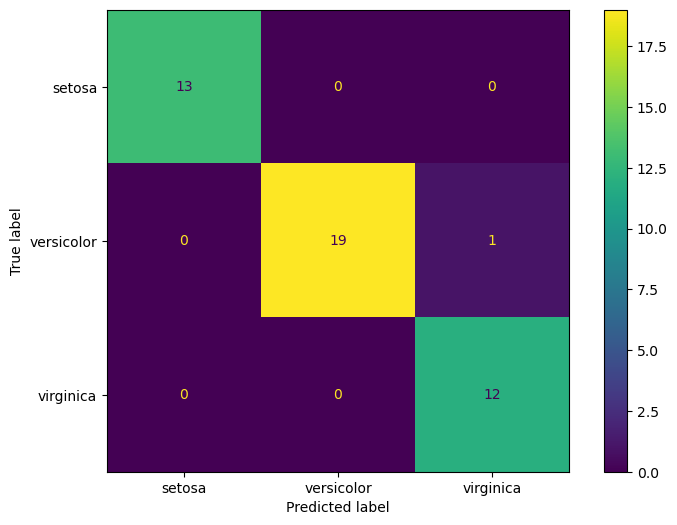

In [60]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.show()

Buradaki hedefimiz hangi class'sa ona göre bakmalıyız.

Örneğin: versicolor'ı 1 alalım:

 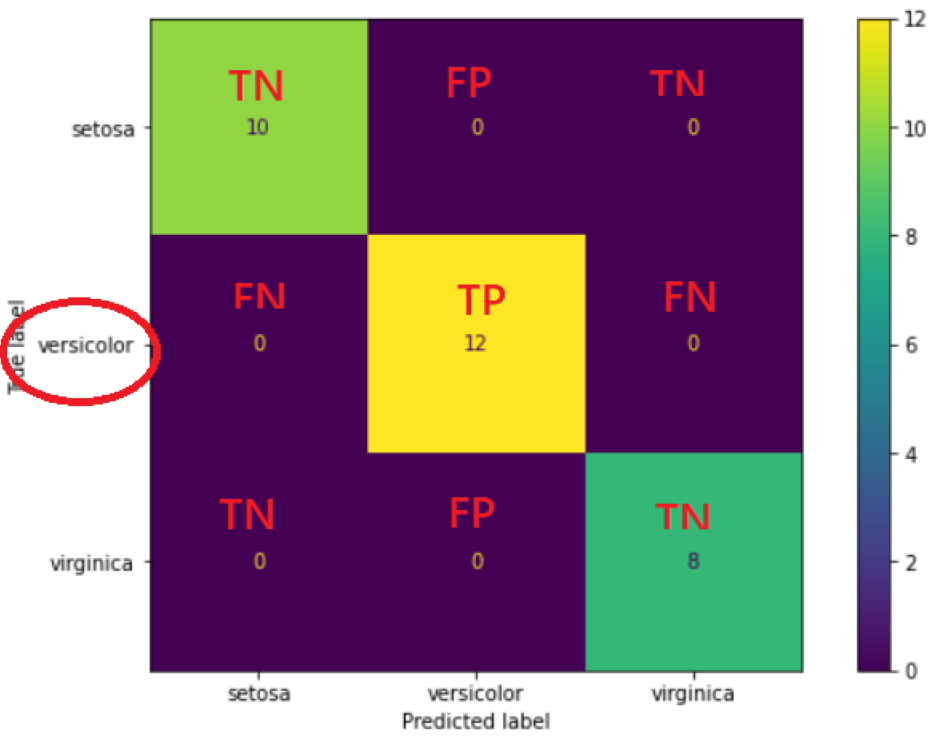